# Airline Passenger Satisfaction dataset description
# phase 3

## Introduction
 Data mining techniques, such as classification and clustering, offer valuable tools for analyzing and extracting insights from datasets. Classification is a supervised learning technique that categorizes data into predefined classes or labels based on input features. The algorithm learns from labeled training data to predict the class labels of unseen instances. Clustering is an unsupervised learning technique that groups similar data points based on their characteristics or features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Load your dataset
data = pd.read_csv('../Dataset/Processed_dataset.csv')

# Apply one-hot encoding to the 'Age' column(categorical)
df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df['Age'], prefix='Age')
df_final = pd.concat([df, df_encoded], axis=1)
df_final = df_final.drop(columns=['Age'])

# Assuming 'X' contains features (Feature Matrix) and 'y' contains labels (Target Vector)
X = df_final.drop(columns=['satisfaction', 'id'])
y = df_final['satisfaction']
print('Preview of the processed data:')
display (df_final)

Preview of the processed data:


,id,Gender,Customer Type,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_<20,Age_>=60
0,19556,0,0,0,1,0.017511,4,3,4,3,...,2,5,0.205761,1,0,0,0,1,0,0
1,90035,0,0,0,0,0.587764,1,3,1,5,...,3,5,0.000000,1,0,1,0,0,0,0
2,12360,1,1,0,1,0.024262,0,2,4,2,...,2,2,0.000000,0,0,0,0,0,1,0
3,77959,1,0,0,0,0.696203,0,0,2,3,...,3,4,0.000000,1,0,0,1,0,0,0
4,36875,0,0,0,1,0.233122,3,4,3,4,...,4,4,0.000000,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1770,1,1,0,0,0.069831,0,5,2,3,...,3,3,0.000000,1,0,0,0,0,1,0
496,70400,0,0,0,0,0.228903,4,4,4,4,...,2,2,0.000000,1,0,0,1,0,0,0
497,15078,0,0,0,0,0.034177,1,1,1,5,...,4,1,0.000000,1,0,1,0,0,0,0
498,4927,0,0,0,0,0.198945,4,4,4,3,...,4,5,0.020576,1,0,0,0,1,0,0


## Classification
We will conduct comprehensive testing of the data mining technique, Decision tree classification, using three partitions. This thorough approach ensures the robustness, reliability, and generalization ability of the classification model, providing reassurance about its reliability for informed decision-making in model selection. In each partition, it will be tested by two attribute selection measures (IG (entropy) Gini index).

#### Three partition sizes:

60% training, 40% testing

70% training, 30% testing

80% training, 20% testing

### Gini index
The Gini index ranges from 0 to 1, where 0 indicates perfect purity (all data points belong to the same class), and 1 means maximum impurity (equal distribution of class labels). Decision trees choose the attribute with the lowest Gini index after a split as the splitting criterion.

### NOTE:
  
The decision trees are too large and complex, so we will prune them by setting a maximum depth to simplify the decision boundaries and reduce overlapping. Pruning removes unnecessary branches from the tree to improve its interpretability without significantly sacrificing predictive performance. 

Decision Tree using Gini Index 60% training 40% test
|--- Online boarding <= 3.50
|   |--- Class <= 0.50
|   |   |--- Leg room service <= 3.50
|   |   |   |--- class: 0
|   |   |--- Leg room service >  3.50
|   |   |   |--- class: 1
|   |--- Class >  0.50
|   |   |--- Online boarding <= 0.50
|   |   |   |--- class: 1
|   |   |--- Online boarding >  0.50
|   |   |   |--- class: 0
|--- Online boarding >  3.50
|   |--- Type of Travel <= 0.50
|   |   |--- Customer Type <= 0.50
|   |   |   |--- class: 1
|   |   |--- Customer Type >  0.50
|   |   |   |--- class: 0
|   |--- Type of Travel >  0.50
|   |   |--- Ease of Online booking <= 4.50
|   |   |   |--- class: 0
|   |   |--- Ease of Online booking >  4.50
|   |   |   |--- class: 1



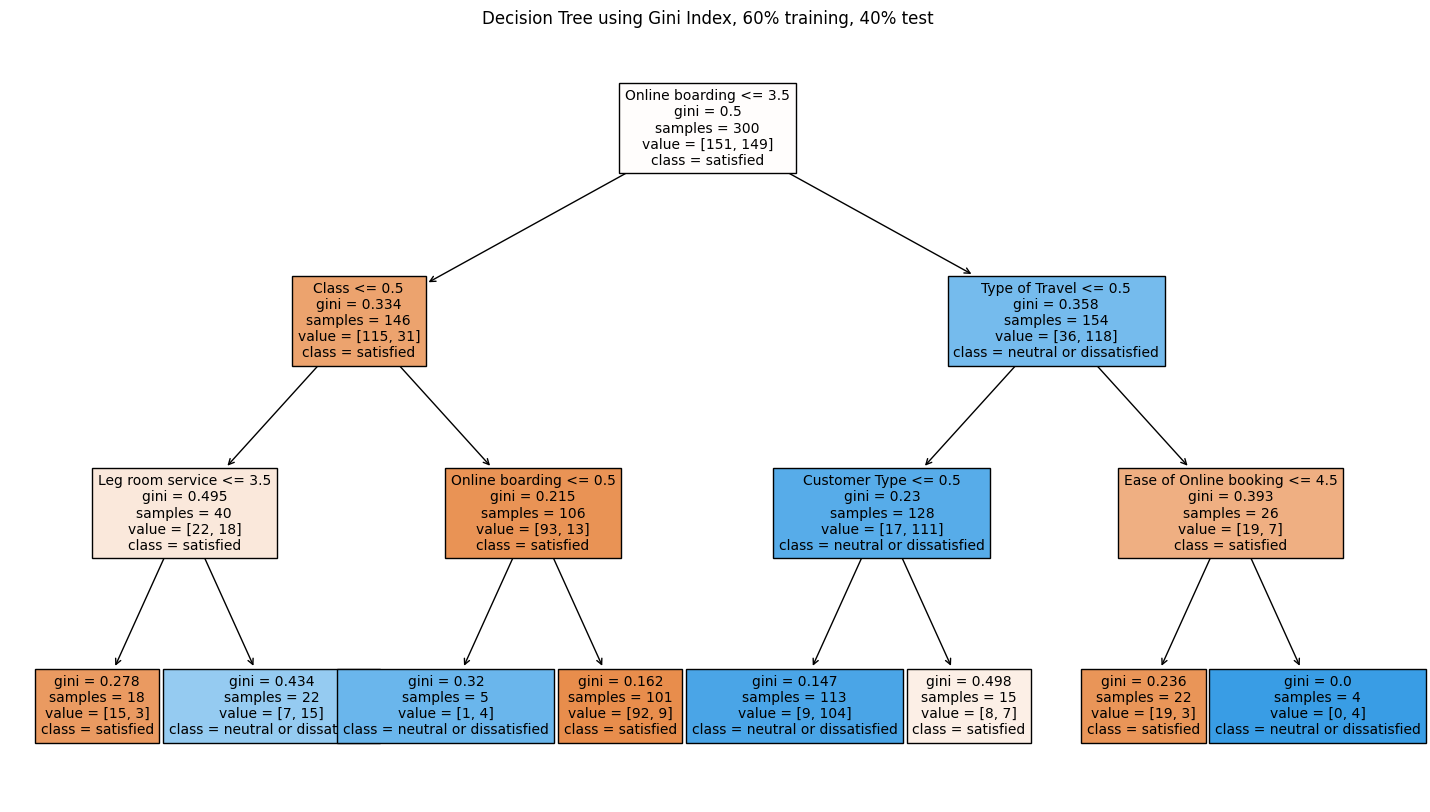

Decision Tree using Gini Index 70% training 30% test
|--- Class <= 0.50
|   |--- Online boarding <= 3.50
|   |   |--- Leg room service <= 3.50
|   |   |   |--- class: 0
|   |   |--- Leg room service >  3.50
|   |   |   |--- class: 1
|   |--- Online boarding >  3.50
|   |   |--- Cleanliness <= 2.50
|   |   |   |--- class: 0
|   |   |--- Cleanliness >  2.50
|   |   |   |--- class: 1
|--- Class >  0.50
|   |--- Online boarding <= 3.50
|   |   |--- Online boarding <= 0.50
|   |   |   |--- class: 1
|   |   |--- Online boarding >  0.50
|   |   |   |--- class: 0
|   |--- Online boarding >  3.50
|   |   |--- Type of Travel <= 0.50
|   |   |   |--- class: 1
|   |   |--- Type of Travel >  0.50
|   |   |   |--- class: 0



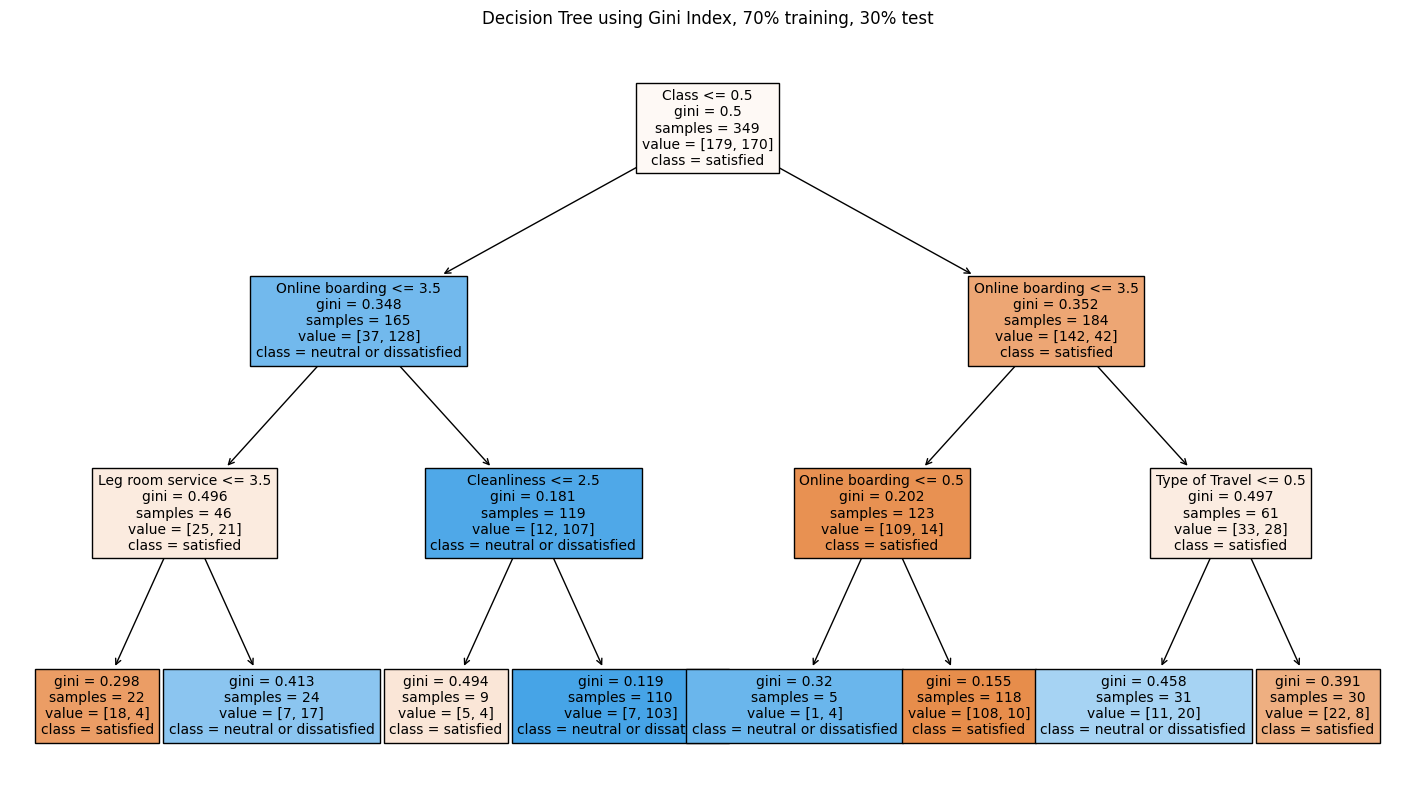

Decision Tree using Gini Index 80% training 19% test
|--- Online boarding <= 3.50
|   |--- Online boarding <= 0.50
|   |   |--- Checkin service <= 2.50
|   |   |   |--- class: 0
|   |   |--- Checkin service >  2.50
|   |   |   |--- class: 1
|   |--- Online boarding >  0.50
|   |   |--- Flight Distance <= 0.39
|   |   |   |--- class: 0
|   |   |--- Flight Distance >  0.39
|   |   |   |--- class: 0
|--- Online boarding >  3.50
|   |--- Type of Travel <= 0.50
|   |   |--- Customer Type <= 0.50
|   |   |   |--- class: 1
|   |   |--- Customer Type >  0.50
|   |   |   |--- class: 0
|   |--- Type of Travel >  0.50
|   |   |--- Gender <= 0.50
|   |   |   |--- class: 0
|   |   |--- Gender >  0.50
|   |   |   |--- class: 1



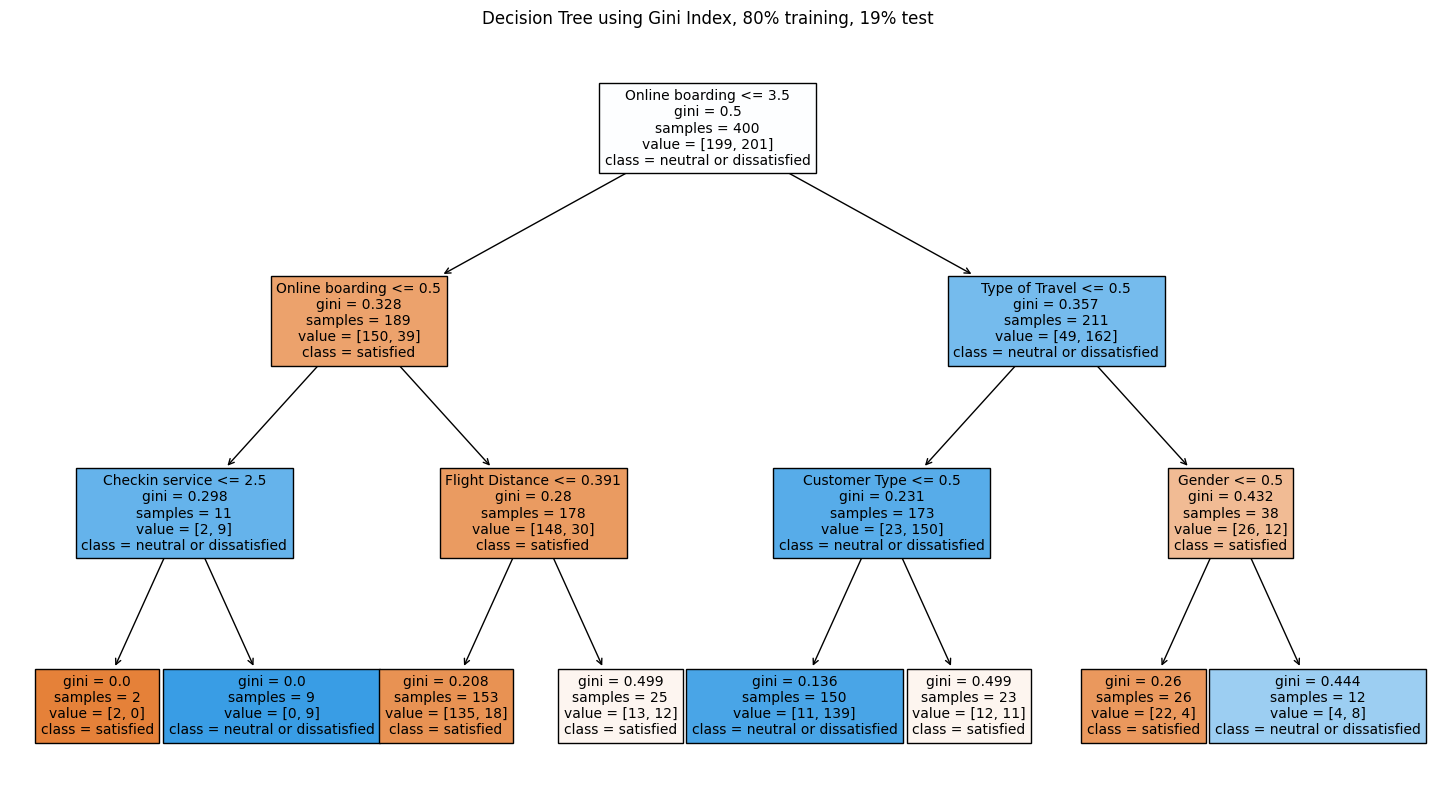

   Partition Size Attribute Selection Measure  Accuracy  Precision    Recall  \
0             0.6                        gini  0.835000   0.877778  0.782178   
1             0.7                        gini  0.827815   0.864865  0.800000   
2             0.8                        gini  0.780000   0.800000  0.734694   

   Specificity  
0     0.888889  
1     0.859155  
2     0.823529  


In [3]:
# Define partition sizes
partition_sizes = [0.6, 0.7, 0.8]

# Initialize an empty list to store results
results = []

# Loop over partition sizes
for size in partition_sizes:
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # Initialize Decision Tree classifier with specified criterion and maximum depth
    clf = DecisionTreeClassifier(criterion='gini', max_depth=3)  # Set max_depth as desired
    
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Extract decision tree rules
    print('Decision Tree using Gini Index {}% training {}% test'.format(int(size*100), int((1-size)*100)))
    tree_rules = export_text(clf, feature_names=X.columns.tolist())
    print(tree_rules)
    
    # Plot the decision tree
    plt.figure(figsize=(18, 10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['satisfied', 'neutral or dissatisfied'],fontsize=10)
    plt.title('Decision Tree using Gini Index, {}% training, {}% test'.format(int(size*100), int((1-size)*100)))
    plt.show()

    # Predict labels for test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    # Append results to list
    results.append((size, 'gini', accuracy, precision, recall, specificity))

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results, columns=['Partition Size', 'Attribute Selection Measure', 'Accuracy', 'Precision', 'Recall', 'Specificity'])
print(results_df)


#### summary of the partition sizes based on Gini index
* The accuracy of the model ranges from approximately 78% to 83.5%, depending on the partition size. Generally, higher partition sizes lead to higher accuracy, with the highest accuracy achieved at a partition size of 60%.
* Precision, which measures the proportion of true positives among all positive predictions, ranges from around 80% to 87.8%. Similar to accuracy, higher precision is observed at a partition size of 60%.
* Recall, also known as sensitivity, represents the proportion of true positives that are correctly identified by the model. It ranges from approximately 73.5% to 80%, with the highest recall achieved at a partition size of 70%.
* Specificity indicates the proportion of true negatives that are correctly identified by the model. It ranges from around 82.4% to 88.9%, with the highest specificity observed at a partition size of 60%.

### Information Gain
Information gain measures the reduction in entropy (uncertainty or disorder), which ranges from 0 to positive infinity. It is achieved by splitting data points on a particular attribute—the attribute with the highest information gain after a split is chosen as the splitting criterion.

### NOTE:
  
The decision trees are too large and complex, so we will prune them by setting a maximum depth to simplify the decision boundaries and reduce overlapping. Pruning removes unnecessary branches from the tree to improve its interpretability without significantly sacrificing predictive performance. 

Decision Tree using Information Gain(entropy) 60% training 40% test
|--- Online boarding <= 3.50
|   |--- Type of Travel <= 0.50
|   |   |--- Customer Type <= 0.50
|   |   |   |--- class: 1
|   |   |--- Customer Type >  0.50
|   |   |   |--- class: 0
|   |--- Type of Travel >  0.50
|   |   |--- Age_40-50 <= 0.50
|   |   |   |--- class: 0
|   |   |--- Age_40-50 >  0.50
|   |   |   |--- class: 0
|--- Online boarding >  3.50
|   |--- Type of Travel <= 0.50
|   |   |--- Flight Distance <= 0.46
|   |   |   |--- class: 1
|   |   |--- Flight Distance >  0.46
|   |   |   |--- class: 1
|   |--- Type of Travel >  0.50
|   |   |--- Ease of Online booking <= 4.50
|   |   |   |--- class: 0
|   |   |--- Ease of Online booking >  4.50
|   |   |   |--- class: 1



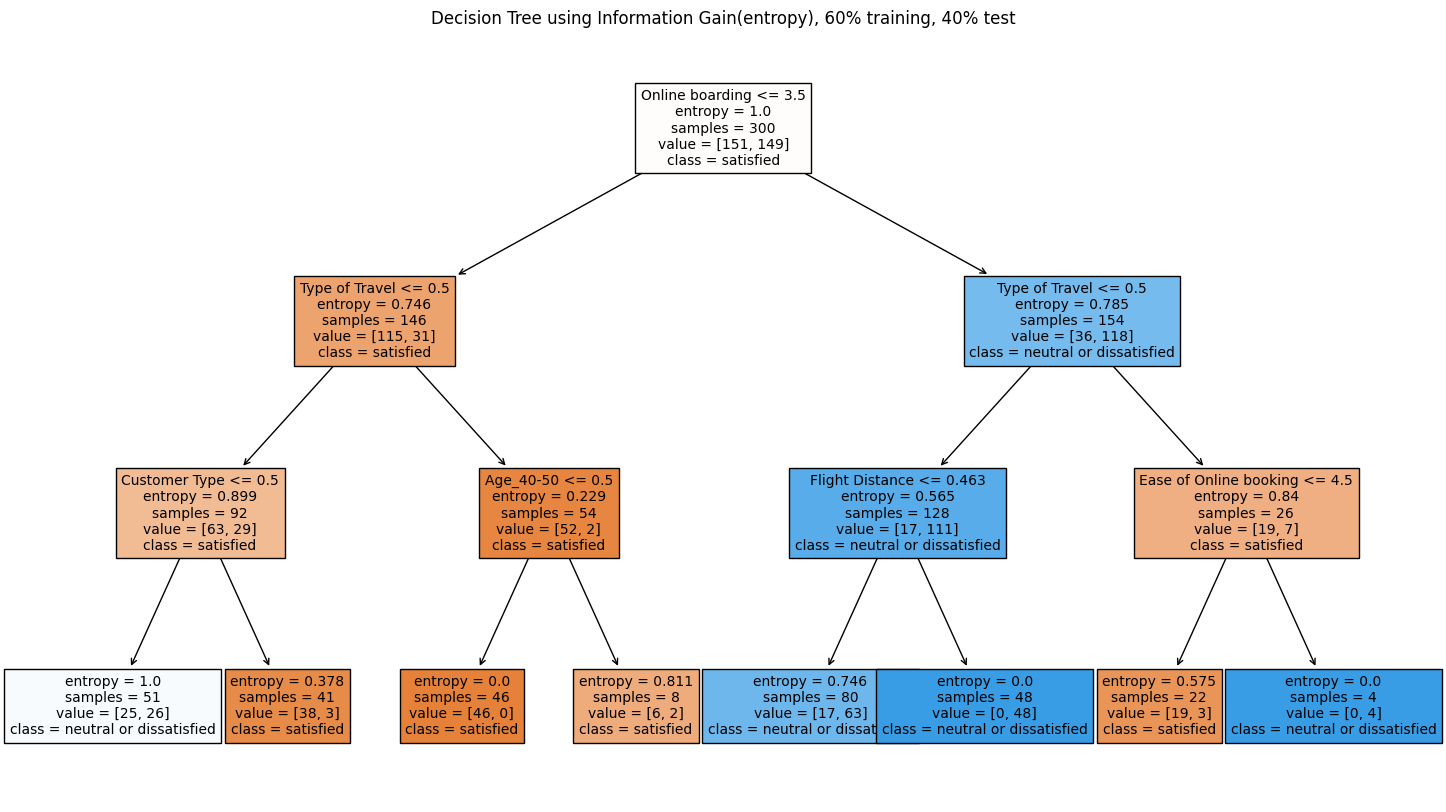

Decision Tree using Information Gain(entropy) 70% training 30% test
|--- Class <= 0.50
|   |--- Online boarding <= 3.50
|   |   |--- Leg room service <= 3.50
|   |   |   |--- class: 0
|   |   |--- Leg room service >  3.50
|   |   |   |--- class: 1
|   |--- Online boarding >  3.50
|   |   |--- Flight Distance <= 0.46
|   |   |   |--- class: 1
|   |   |--- Flight Distance >  0.46
|   |   |   |--- class: 1
|--- Class >  0.50
|   |--- Online boarding <= 3.50
|   |   |--- Online boarding <= 0.50
|   |   |   |--- class: 1
|   |   |--- Online boarding >  0.50
|   |   |   |--- class: 0
|   |--- Online boarding >  3.50
|   |   |--- Type of Travel <= 0.50
|   |   |   |--- class: 1
|   |   |--- Type of Travel >  0.50
|   |   |   |--- class: 0



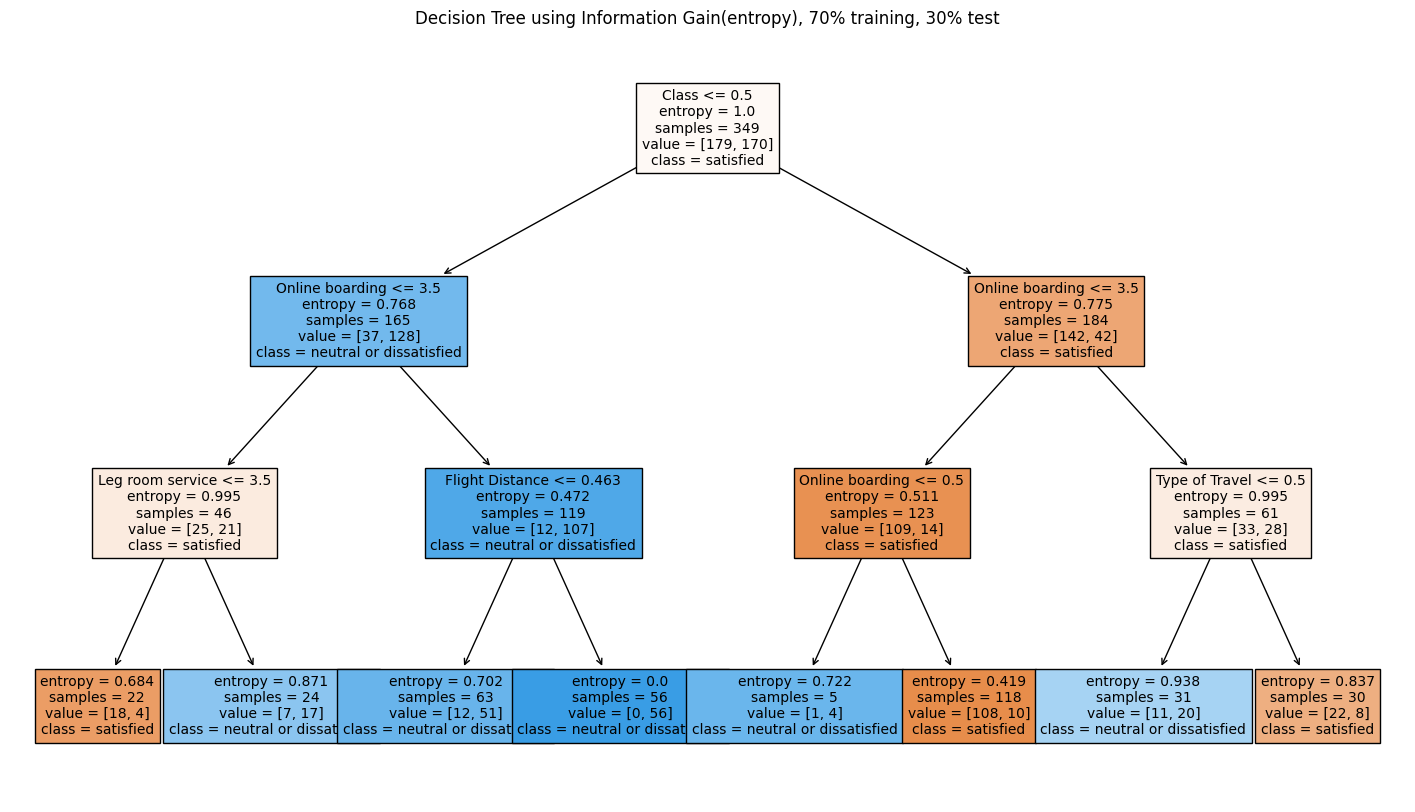

Decision Tree using Information Gain(entropy) 80% training 19% test
|--- Online boarding <= 3.50
|   |--- Online boarding <= 0.50
|   |   |--- Checkin service <= 2.50
|   |   |   |--- class: 0
|   |   |--- Checkin service >  2.50
|   |   |   |--- class: 1
|   |--- Online boarding >  0.50
|   |   |--- Type of Travel <= 0.50
|   |   |   |--- class: 0
|   |   |--- Type of Travel >  0.50
|   |   |   |--- class: 0
|--- Online boarding >  3.50
|   |--- Type of Travel <= 0.50
|   |   |--- Customer Type <= 0.50
|   |   |   |--- class: 1
|   |   |--- Customer Type >  0.50
|   |   |   |--- class: 0
|   |--- Type of Travel >  0.50
|   |   |--- Ease of Online booking <= 3.50
|   |   |   |--- class: 0
|   |   |--- Ease of Online booking >  3.50
|   |   |   |--- class: 1



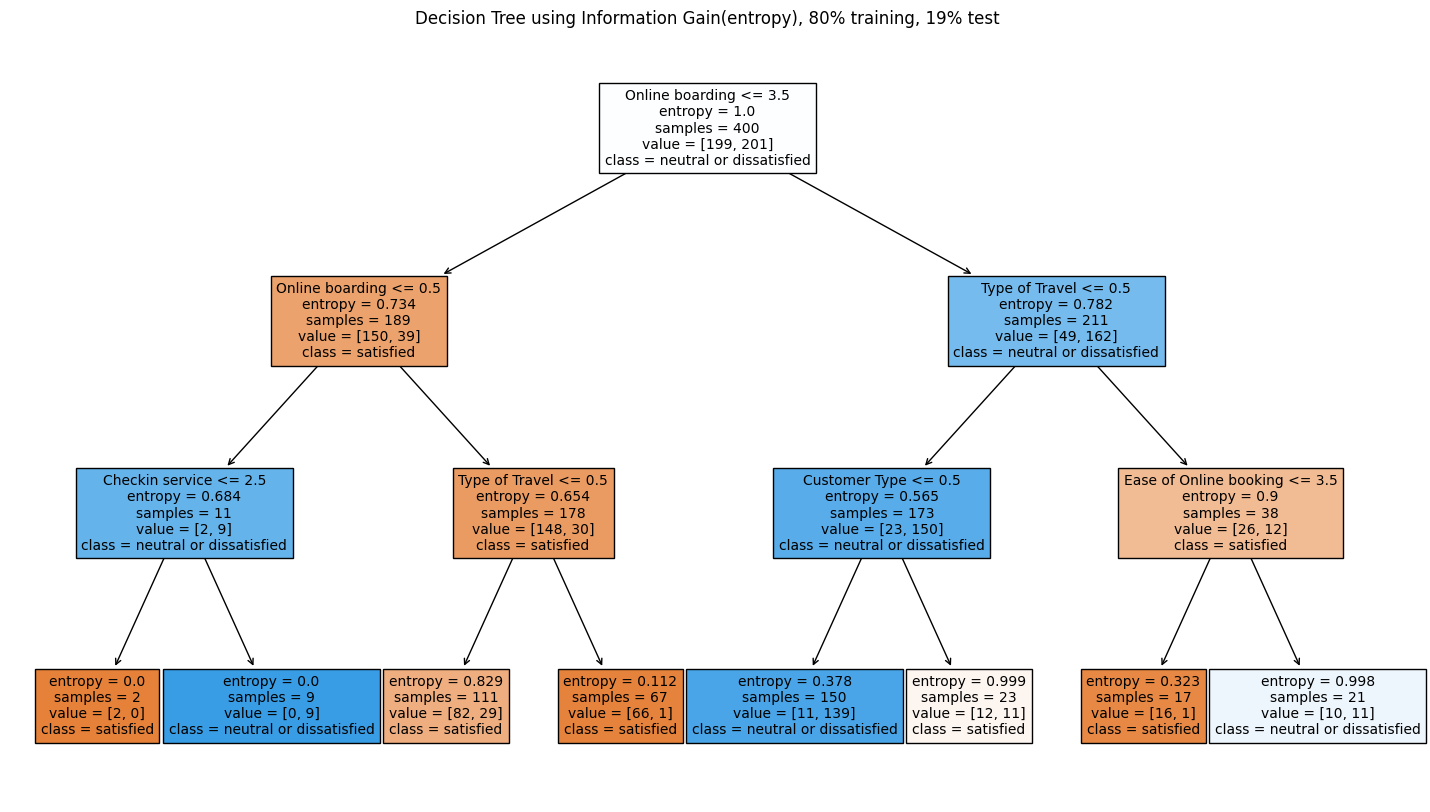

   Partition Size Attribute Selection Measure  Accuracy  Precision    Recall  \
0             0.6                     entropy  0.830000   0.781513  0.920792   
1             0.7                     entropy  0.847682   0.860759  0.850000   
2             0.8                     entropy  0.780000   0.800000  0.734694   

   Specificity  
0     0.737374  
1     0.845070  
2     0.823529  


In [4]:
# Define partition sizes
partition_sizes = [0.6, 0.7, 0.8]

# Initialize an empty list to store results
results = []

# Loop over partition sizes
for size in partition_sizes:
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # Initialize Decision Tree classifier with specified criterion and maximum depth
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)  # Set max_depth as desired
    
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Extract decision tree rules
    print('Decision Tree using Information Gain(entropy) {}% training {}% test'.format(int(size*100), int((1-size)*100)))
    tree_rules = export_text(clf, feature_names=X.columns.tolist())
    print(tree_rules)
    
    # Plot the decision tree
    plt.figure(figsize=(18, 10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['satisfied', 'neutral or dissatisfied'],fontsize=10)
    plt.title('Decision Tree using Information Gain(entropy), {}% training, {}% test'.format(int(size*100), int((1-size)*100)))
    plt.show()

    # Predict labels for test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    # Append results to list
    results.append((size, 'entropy', accuracy, precision, recall, specificity))

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results, columns=['Partition Size', 'Attribute Selection Measure', 'Accuracy', 'Precision', 'Recall', 'Specificity'])
print(results_df)


#### summary of the partition sizes based on Information Gain(entropy)
* The accuracy of the model ranges from approximately 78% to 85%, depending on the partition size. The highest accuracy is achieved at a partition size of 70%.
* Precision, which measures the proportion of true positives among all positive predictions, ranges from around 78.1% to 86.1%. The highest precision is observed at a partition size of 70%.
* Recall represents the proportion of true positives that are correctly identified by the model. It ranges from approximately 73.5% to 92.1%, with the highest recall achieved at a partition size of 60%
* Specificity indicates the proportion of true negatives that are correctly identified by the model. It ranges from around 73.7% to 84.5%, with the highest specificity observed at a partition size of 70%.

### Synopsis of classification of Airline-Passenger-Satisfaction processed data

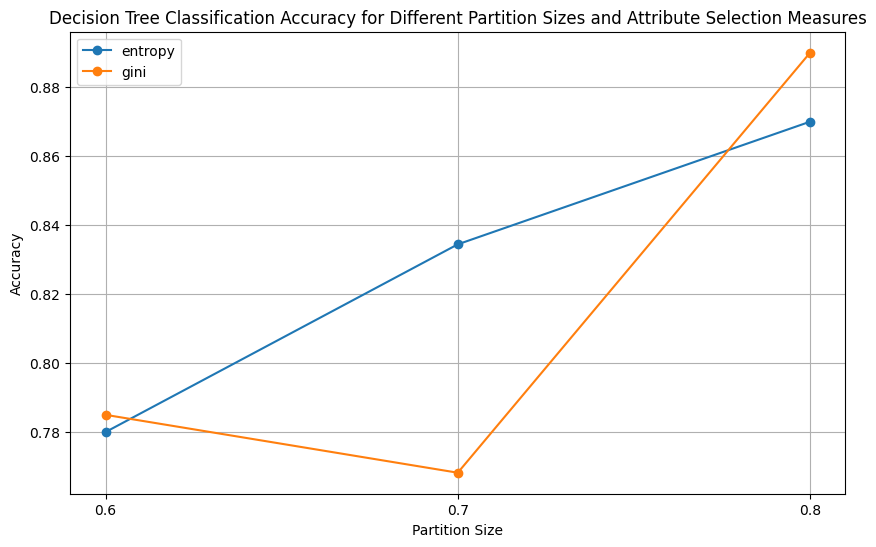

   Partition Size Attribute Selection Measure  Accuracy  Precision    Recall  \
0             0.6                     entropy  0.780000   0.800000  0.752475   
1             0.6                        gini  0.785000   0.778846  0.801980   
2             0.7                     entropy  0.834437   0.866667  0.812500   
3             0.7                        gini  0.768212   0.816901  0.725000   
4             0.8                     entropy  0.870000   0.860000  0.877551   
5             0.8                        gini  0.890000   0.895833  0.877551   

   Specificity  
0     0.808081  
1     0.767677  
2     0.859155  
3     0.816901  
4     0.862745  
5     0.901961  


In [5]:
# Define partition sizes
partition_sizes = [0.6, 0.7, 0.8]

# Define attribute selection measures
selection_measures = ['entropy', 'gini']

# Initialize lists to store results
accuracies = []

# Loop over partition sizes
for size in partition_sizes:
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # Loop over attribute selection measures
    for measure in selection_measures:
        # Initialize Decision Tree classifier with specified criterion
        clf = DecisionTreeClassifier(criterion=measure)
        
        # Fit the classifier on the training data
        clf.fit(X_train, y_train)
        
        # Predict labels for test set
        y_pred = clf.predict(X_test)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        
        # Append results to list
        accuracies.append((size, measure, accuracy, precision, recall, specificity))

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(accuracies, columns=['Partition Size', 'Attribute Selection Measure', 'Accuracy', 'Precision', 'Recall', 'Specificity'])

# Plotting results
plt.figure(figsize=(10, 6))
for measure in selection_measures:
    measure_df = results_df[results_df['Attribute Selection Measure'] == measure]
    plt.plot(measure_df['Partition Size'], measure_df['Accuracy'], marker='o', label=measure)

plt.title('Decision Tree Classification Accuracy for Different Partition Sizes and Attribute Selection Measures')
plt.xlabel('Partition Size')
plt.ylabel('Accuracy')
plt.xticks(partition_sizes)
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(results_df)

Overall, both attribute selection measures perform similarly in terms of accuracy, precision, recall, and specificity. However, the decision tree models based on the entropy measure tend to achieve slightly higher accuracy and recall compared to those based on the gini measure, especially at a partition size of 0.8. Additionally, both measures demonstrate higher specificity at larger partition sizes.

## Clustering
### Silhouette coefficient

In [6]:
# remove the target column

# Get the name of the last column
last_column_name = df.columns[-1]
print(last_column_name)

satisfaction


In [7]:
# Drop the last column
df_features = df.drop(last_column_name, axis=1)

In [13]:
# Define the different sizes of K
K_values = [2, 4, 10]

# Dictionary to hold the results
results = {}

for K in K_values:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=K, random_state=42)
    clusters = kmeans.fit_predict(df_final)
    
    # Calculate silhouette score for the current K
    silhouette_avg = silhouette_score(df_final, clusters)
    
    # Store results
    results[K] = {
        'kmeans': kmeans,
        'clusters': clusters,
        'silhouette_score': silhouette_avg
    }

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Selecting k values of 2, 10, and 18 for clustering a dataset with 500 entries and 20 features offers a structured approach to data analysis

Starting with K=2
which is common in exploratory data analysis to see if the data can be broadly divided into two distinct groups. This is the simplest form of clustering beyond a single cluster and can provide initial insights into the data's structure

K=10
explores more detailed clusters since it's about half the number of features

k=18
enables a detailed exploration of the data's underlying structure, aligning with the dataset's complexity while ensuring a comprehensive analysis without overwhelming computational demands.

In [14]:
# Choose one K value for plotting
selected_K = K_values[-1] 
selected_clusters = results[selected_K]['clusters']
selected_kmeans = results[selected_K]['kmeans']

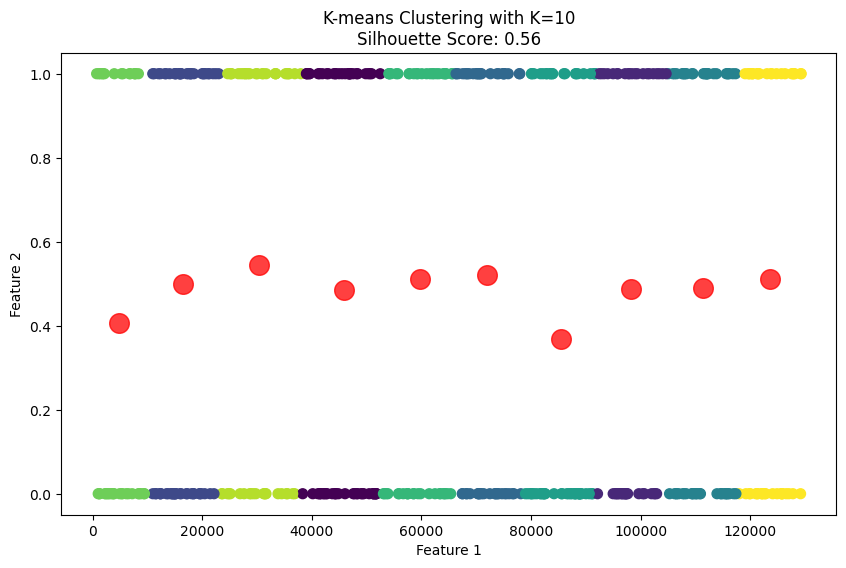

In [15]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_final.iloc[:, 0], df_final.iloc[:, 1], c=selected_clusters, s=50, cmap='viridis')  # Use .iloc for Pandas DataFrame
centers = selected_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title(f'K-means Clustering with K={selected_K}\nSilhouette Score: {results[selected_K]["silhouette_score"]:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

while the silhouette score suggests a moderate fit, the visual plot indicates that there might be some overlap or the clusters are not very well separated, as indicated by the score being less than 0.5. This could imply that while the algorithm has identified 18 distinct groups, some of these groups may not be very distinct from one another, which is not uncommon in higher dimensions with a moderate number of clusters.

### Elbow (total within-cluster sum of square)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

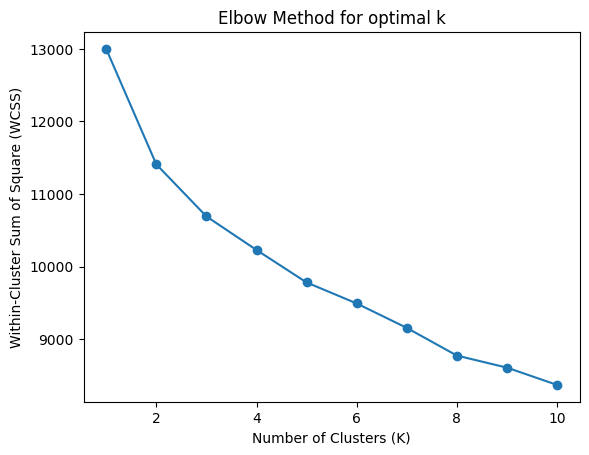

In [16]:
#preform k-means clustring for different value of k
wss_values=[]
K_values=range(1,11)
for k in K_values:
    kmeans=make_pipeline(StandardScaler(),KMeans(n_clusters=k))
    kmeans.fit(df_final)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)
# plot the elbow method
plt.plot(K_values,wss_values,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.title('Elbow Method for optimal k')

plt.show()